In [1]:
import numpy as np 
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
project_name = '5. Used Car'
base_dir = 'D:/Projects/Prediction/Techniques Practice/Trees/XGBoost'
temp_dir = base_dir + '/' + project_name + '/' + 'temp data' + '/'
temp_dir

'D:/Projects/Prediction/Techniques Practice/Trees/XGBoost/5. Used Car/temp data/'

In [8]:
used_car_df = pd.read_csv(temp_dir + 'used_car_df.csv')
used_car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115472 entries, 0 to 115471
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         115472 non-null  object 
 1   year          115472 non-null  float64
 2   price         115472 non-null  float64
 3   transmission  115472 non-null  object 
 4   mileage       115472 non-null  float64
 5   fuelType      115472 non-null  object 
 6   tax           115472 non-null  float64
 7   mpg           115472 non-null  float64
 8   engineSize    115472 non-null  float64
 9   make          115472 non-null  object 
dtypes: float64(6), object(4)
memory usage: 8.8+ MB


array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'mileage'}>,
        <AxesSubplot:title={'center':'tax'}>],
       [<AxesSubplot:title={'center':'mpg'}>,
        <AxesSubplot:title={'center':'engineSize'}>]], dtype=object)

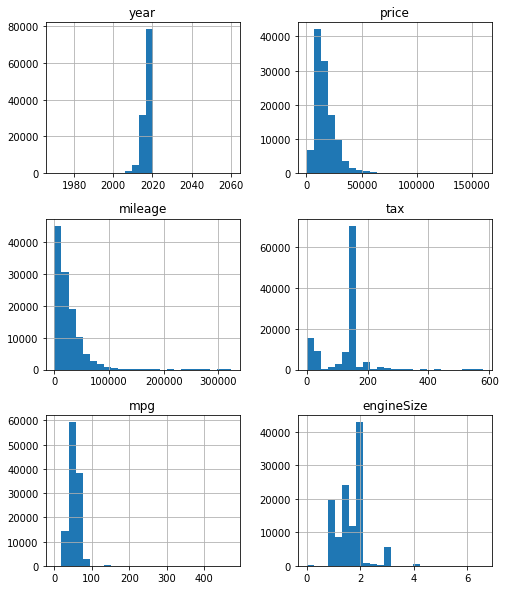

In [11]:
used_car_df.hist(figsize=(8,10),bins=25)

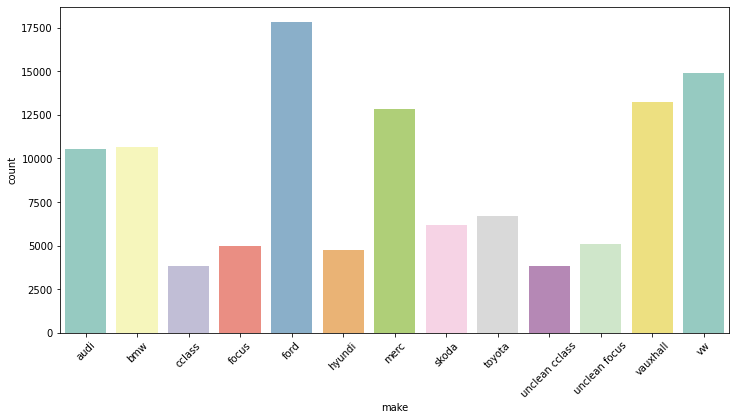

In [23]:
width = 12
height = 6
plt.figure(figsize=(width,height))
model = sns.countplot(x = 'make', data=used_car_df, palette='Set3')
model.set(xlabel='make',ylabel='count', label= "make")
plt.setp(model.get_xticklabels(), rotation=45)
plt.show()

In [26]:
used_car_df.model.value_counts().head(10)

 Focus       14623
 C Class     11386
 Fiesta       6509
 Golf         4797
 Corsa        3285
 Polo         3244
 Astra        2655
 A Class      2474
 3 Series     2434
 Kuga         2208
Name: model, dtype: int64

In [27]:
used_car_df.sample()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make
111433,Tiguan,2019.0,22680.0,Manual,4000.0,Petrol,145.0,38.2,1.5,vw


In [30]:
pd.crosstab(used_car_df['make'],used_car_df['fuelType'])


fuelType,Diesel,Electric,Hybrid,Other,Petrol
make,,,,,
audi,5537,0,28,0,5000
bmw,6988,3,297,36,3340
cclass,2303,0,151,6,1394
focus,1748,0,0,0,3214
ford,5706,2,22,1,12080
hyundi,1595,0,340,1,2838
merc,9034,0,170,7,3649
skoda,2046,0,18,9,4115
toyota,496,0,2040,105,4058


In [35]:
used_car_df.model.unique().shape

(195,)

<AxesSubplot:>

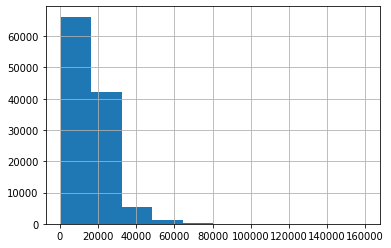

In [36]:
used_car_df.price.hist()

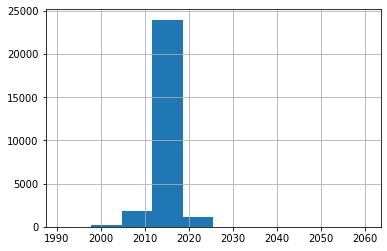

<AxesSubplot:>

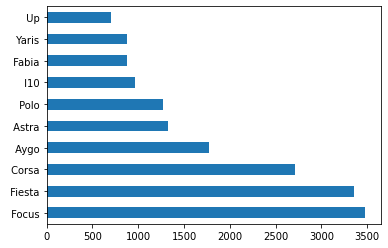

In [44]:
#which cars cost over 60000 and under 10000? 
used_car_df[used_car_df.price<10000].year.hist()
plt.show()
used_car_df[used_car_df.price<10000].model.value_counts().head(10).plot(kind='barh')

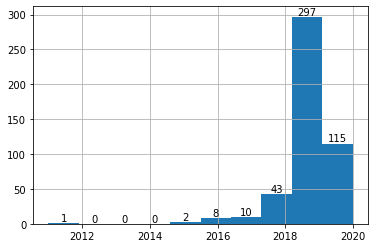

<AxesSubplot:>

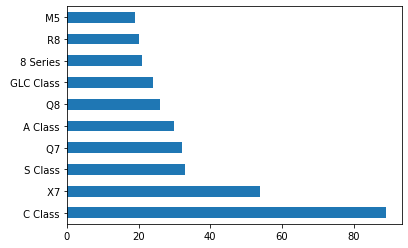

In [49]:
# that is really interesting, there are some really old cars that are really expensive. Would have thought that there would be a lot from max year but the case seems to be 
ax =used_car_df[used_car_df.price>60000].year.hist()
ax.bar_label(ax.containers[0])

plt.show()
#models are all fancy cars which we would expect - even if they are old 
used_car_df[used_car_df.price>60000].model.value_counts().head(10).plot(kind='barh')

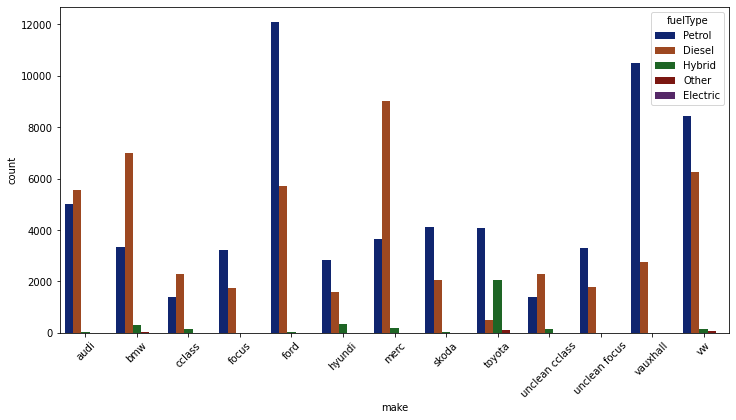

In [56]:
plt.figure(figsize=(12,6))
fuelTypeplt = sns.countplot(x='make',data = used_car_df, hue='fuelType',palette='dark')
plt.setp(fuelTypeplt.get_xticklabels(), rotation=45)
plt.show()

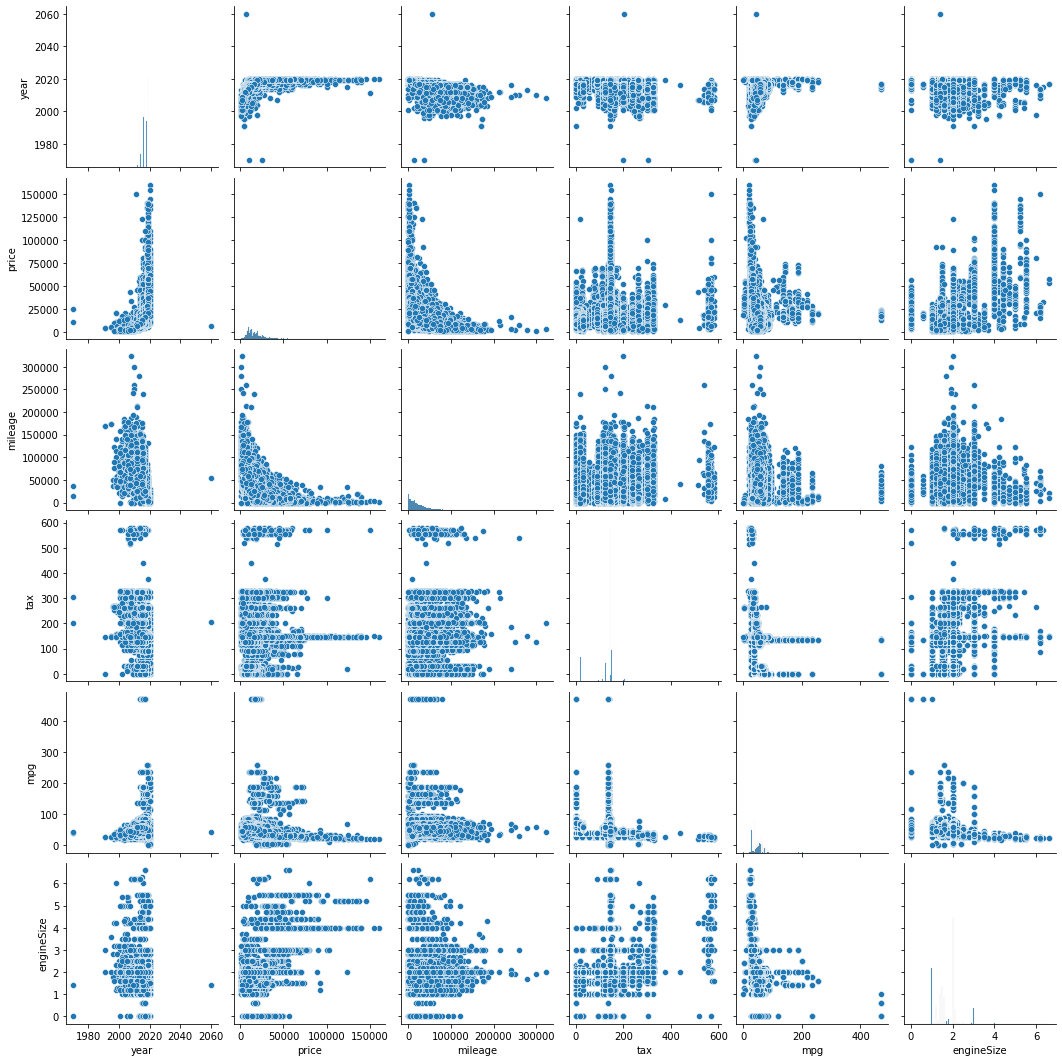

In [57]:
sns.pairplot(used_car_df)

<AxesSubplot:xlabel='mileage', ylabel='price'>

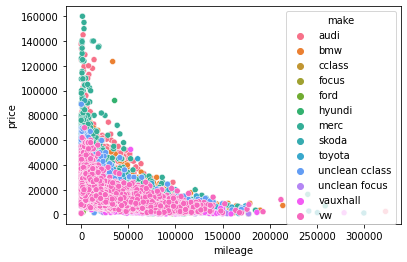

In [58]:
#mileage and price probably have the most direct relationship 

sns.scatterplot(x='mileage',y='price',data=used_car_df,hue='make')

In [62]:
sns.catplot(x='mileage',y='price',data=used_car_df,hue='make', )

ValueError: Plot kind 'scatter' is not recognized

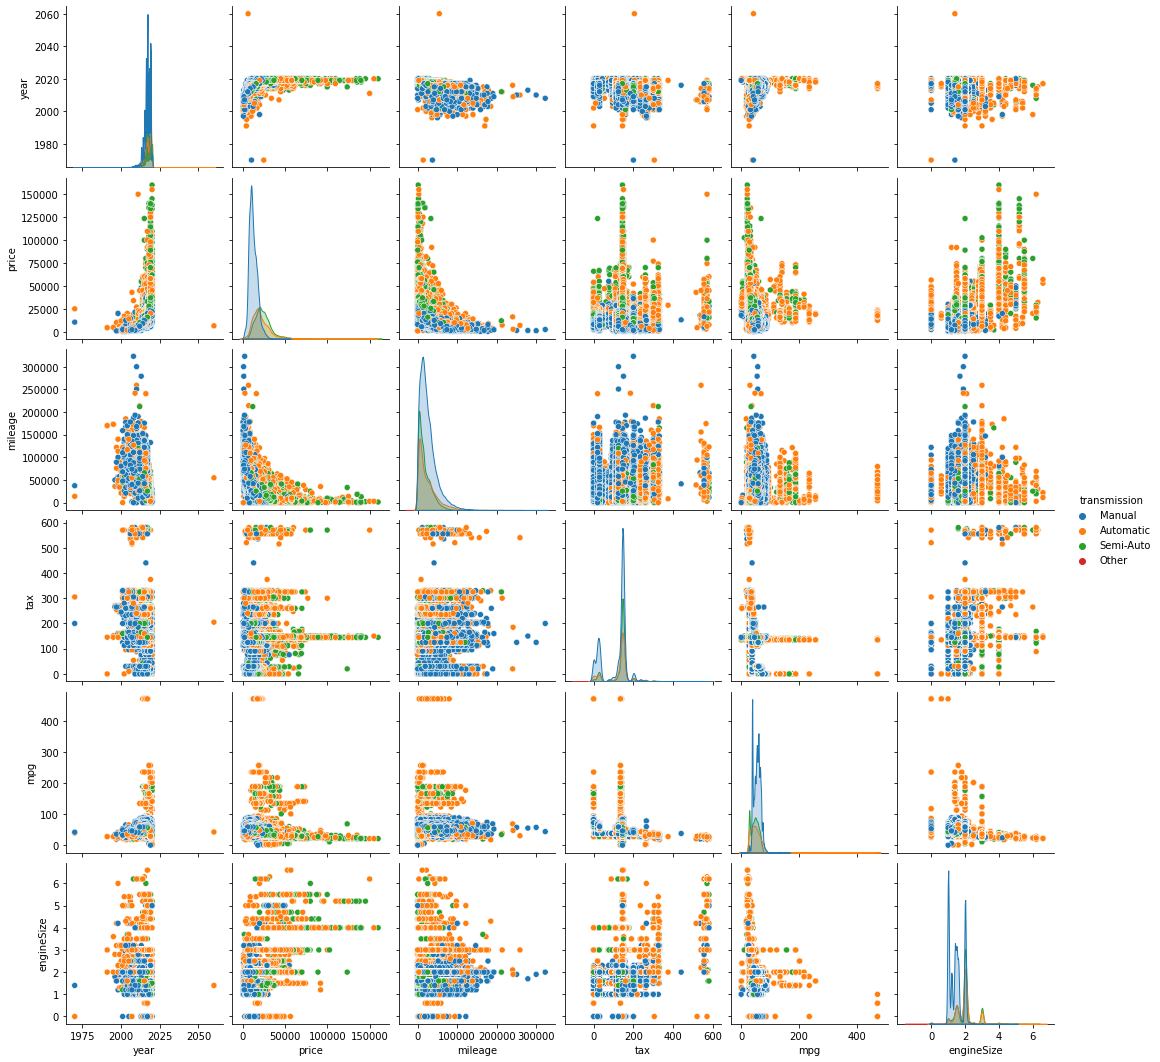

In [63]:
sns.pairplot(used_car_df,hue='transmission')


In [64]:
#what are the cars that have super low mpg and really high engine size? 

c1 = used_car_df.mpg<20
c2 = used_car_df.engineSize>3
used_car_df[c1&c2]

#lol these cars seem really inefficient. Interesting that most of them are quite old. and super fancy. 

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make
1858,R8,2013.0,47995.0,Manual,19834.0,Petrol,570.0,19.6,4.2,audi
8845,A6,2004.0,8995.0,Automatic,100730.0,Petrol,325.0,19.3,4.2,audi
10324,A8,1997.0,4650.0,Automatic,122000.0,Petrol,265.0,18.9,4.2,audi
19680,M6,2006.0,12495.0,Semi-Auto,89000.0,Petrol,570.0,19.1,5.0,bmw
63954,CL Class,2008.0,18975.0,Automatic,69000.0,Petrol,570.0,19.0,6.2,merc
63955,CLK,2003.0,3495.0,Automatic,185000.0,Petrol,330.0,17.8,4.3,merc
64296,E Class,2008.0,14995.0,Semi-Auto,55000.0,Petrol,570.0,19.8,6.2,merc
65143,S Class,2010.0,26990.0,Automatic,38000.0,Petrol,570.0,19.5,6.2,merc


In [65]:
#are these all hybrid or electric?
c1 = used_car_df.mpg>200
used_car_df[c1]


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make
10597,i3,2016.0,17100.0,Automatic,25269.0,Other,0.0,470.8,0.6,bmw
11184,i3,2017.0,19998.0,Automatic,41949.0,Hybrid,140.0,470.8,0.0,bmw
11340,i3,2017.0,19998.0,Automatic,41146.0,Hybrid,0.0,470.8,0.0,bmw
11342,i3,2017.0,21898.0,Automatic,10839.0,Hybrid,0.0,470.8,0.0,bmw
12367,i3,2017.0,19980.0,Automatic,26965.0,Hybrid,140.0,470.8,0.0,bmw
...,...,...,...,...,...,...,...,...,...,...
77928,Prius,2019.0,28590.0,Automatic,5000.0,Other,135.0,217.3,1.8,toyota
77932,Prius,2019.0,26990.0,Automatic,7000.0,Other,135.0,217.3,1.8,toyota
100263,Ampera,2014.0,10495.0,Automatic,50486.0,Hybrid,0.0,235.4,0.0,vauxhall
100264,Ampera,2014.0,11400.0,Automatic,64764.0,Hybrid,0.0,235.4,0.0,vauxhall


In [66]:
used_car_df[c1].fuelType.value_counts()

Hybrid      67
Other       12
Electric     4
Name: fuelType, dtype: int64

In [67]:
used_car_df[c1].model.value_counts()

 i3         43
 Prius      21
 Kuga        5
 Superb      5
 Ioniq       3
 Ampera      3
 C Class     2
 E Class     1
Name: model, dtype: int64

In [68]:
#what are the cars with ridiculous engine sizes
#mostly SUVs?
c1 = used_car_df.engineSize>2.5
used_car_df[c1]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make
22,A5,2017.0,22500.0,Automatic,21649.0,Diesel,145.0,58.9,3.0,audi
23,A6,2015.0,17500.0,Automatic,62748.0,Diesel,150.0,53.3,3.0,audi
49,S4,2017.0,23700.0,Automatic,20278.0,Petrol,145.0,38.7,3.0,audi
92,A6,2016.0,15500.0,Automatic,24744.0,Diesel,125.0,56.5,3.0,audi
106,Q5,2016.0,30000.0,Semi-Auto,49649.0,Diesel,235.0,42.2,3.0,audi
...,...,...,...,...,...,...,...,...,...,...
115141,Amarok,2019.0,30000.0,Automatic,6900.0,Diesel,260.0,33.6,3.0,vw
115142,Amarok,2019.0,37995.0,Automatic,7583.0,Diesel,260.0,28.3,3.0,vw
115143,Amarok,2019.0,28995.0,Automatic,10.0,Diesel,260.0,28.3,3.0,vw
115144,Amarok,2017.0,23495.0,Automatic,37683.0,Diesel,260.0,36.2,3.0,vw


<AxesSubplot:>

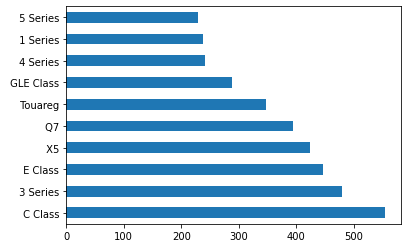

In [72]:
used_car_df[c1].model.value_counts().head(10).plot(kind='barh')

In [74]:
# I would have expected price and engine size to have been correlated. What are the cars with small engines and cost a lot? 

#okay well this is an insight for me. like. most cars. so many. have tiny engines and are expensive. but at the same time mpg seem high? maybe they are expensive because they have good economy (high mpg)
c1 = used_car_df.engineSize<2
c2 = used_car_df.price>5000
used_car_df[c1&c2]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make
0,A1,2017.0,12500.0,Manual,15735.0,Petrol,150.0,55.4,1.4,audi
2,A1,2016.0,11000.0,Manual,29946.0,Petrol,30.0,55.4,1.4,audi
4,A3,2019.0,17300.0,Manual,1998.0,Petrol,145.0,49.6,1.0,audi
5,A1,2016.0,13900.0,Automatic,32260.0,Petrol,30.0,58.9,1.4,audi
8,A3,2015.0,10200.0,Manual,46112.0,Petrol,20.0,60.1,1.4,audi
...,...,...,...,...,...,...,...,...,...,...
115454,Caddy,2012.0,9995.0,Manual,26142.0,Diesel,200.0,48.7,1.6,vw
115457,Caddy Maxi,2015.0,9995.0,Semi-Auto,66000.0,Diesel,200.0,48.7,1.6,vw
115458,Caddy Maxi,2012.0,9995.0,Semi-Auto,53000.0,Diesel,200.0,48.7,1.6,vw
115459,Caddy Maxi,2015.0,9949.0,Automatic,93113.0,Diesel,160.0,52.3,1.6,vw


In [76]:
c1 = used_car_df.engineSize>2
c2 = used_car_df.price<5000
used_car_df[c1&c2]

# these are your really old cars, your super high mileage cars, 

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make
7661,A6,2003.0,2495.0,Automatic,117000.0,Diesel,290.000000,39.8,2.5,audi
9262,A6,2003.0,2495.0,Manual,129000.0,Diesel,325.000000,31.7,2.5,audi
10004,A4,2005.0,4990.0,Manual,87990.0,Diesel,325.000000,36.7,3.0,audi
10009,A4,2008.0,3990.0,Manual,148000.0,Diesel,305.000000,35.8,3.0,audi
10080,A6,2007.0,3990.0,Automatic,70000.0,Diesel,300.000000,39.8,2.7,audi
...,...,...,...,...,...,...,...,...,...,...
81937,C Class,2003.0,1795.0,Automatic,88082.0,Diesel,145.233333,28.0,2.1,unclean cclass
82048,C Class,2008.0,3999.0,Automatic,170000.0,Diesel,130.000000,28.0,2.1,unclean cclass
82077,C Class,2002.0,3690.0,Automatic,20000.0,Petrol,145.161290,28.0,2.5,unclean cclass
99233,Antara,2012.0,4995.0,Manual,75023.0,Diesel,240.000000,42.8,2.2,vauxhall
